In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
def display_labeled_images(image_dir1, label_dir, image_dir2=None, num_images=3):
    """
    Display a random set of images from one or two directories with corresponding YOLO labels.

    Args:
        image_dir1 (str): Path to the first directory containing images.
        label_dir (str): Path to the directory containing YOLO format label files.
        image_dir2 (str, optional): Path to the second directory containing images (same image names). Default is None.
        num_images (int): Number of random images to display. Default is 3.
    """
    # Get a list of all image files in the first image directory
    image_files = [f for f in os.listdir(image_dir1) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    if len(image_files) == 0:
        print("No images found in the specified directory.")
        return

    # Select a random subset of image files
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    # Determine the number of rows (1 if only one directory, 2 if both)
    rows = 1 if image_dir2 is None else 2
    cols = len(selected_images)

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

    # If only one row, flatten axes to 1D for consistent indexing
    if rows == 1:
        axes = axes.flatten()
    else:
        axes = axes.reshape(rows, cols)  # Ensure proper shape for 2D access

    # Directories to process (conditionally including image_dir2)
    directories = [image_dir1] if image_dir2 is None else [image_dir1, image_dir2]

    for row, image_dir in enumerate(directories):
        for col, image_file in enumerate(selected_images):
            ax = axes[col] if rows == 1 else axes[row, col]  # Correct indexing for 1D or 2D axes

            # Load the image
            image_path = os.path.join(image_dir, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Load the corresponding label file
            label_file = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')

            if os.path.exists(label_file):
                with open(label_file, 'r') as f:
                    labels = f.readlines()

                # Parse and draw bounding boxes from YOLO labels
                h, w, _ = image.shape
                for label in labels:
                    parts = label.strip().split()
                    if len(parts) < 5:
                        continue
                    _, x_center, y_center, bbox_width, bbox_height = map(float, parts)

                    # Convert YOLO format to pixel coordinates
                    x_min = int((x_center - bbox_width / 2) * w)
                    x_max = int((x_center + bbox_width / 2) * w)
                    y_min = int((y_center - bbox_height / 2) * h)
                    y_max = int((y_center + bbox_height / 2) * h)

                    # Draw the bounding box on the image
                    image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Display the image in the grid
            ax.imshow(image)
            ax.axis('off')  # Remove axes and titles

    plt.tight_layout()
    plt.show()

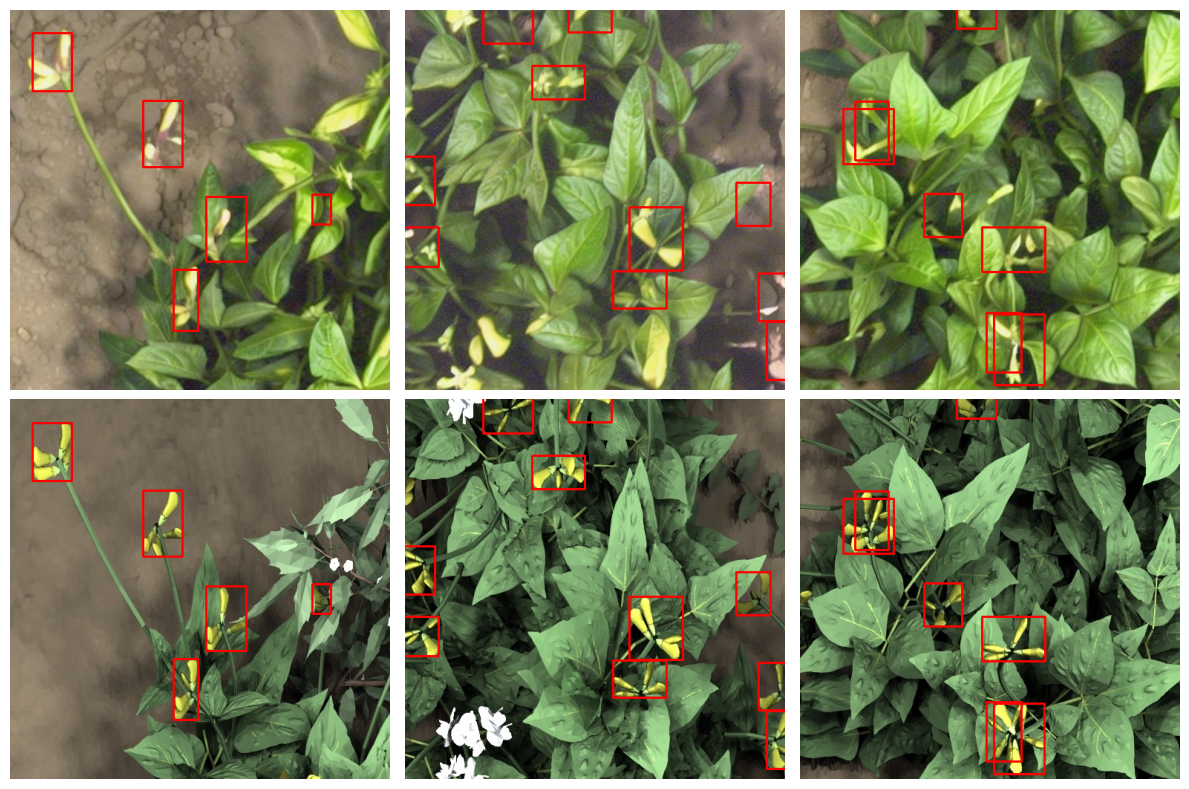

In [13]:
display_labeled_images(
    image_dir1='/group/jmearlesgrp/intermediate_data/eranario/AGILE/flower_syn2real/agile/0304_CONTROL_flower_syn2real_token-1_timestep-30_layer-avg_strength-1.0_2-2_generate-agile/attention_guidance_0',
    image_dir2='/group/jmearlesgrp/data/AGILE-Datasets/Flower-Detection/Synthetic/splits/train/images',
    label_dir='/group/jmearlesgrp/data/AGILE-Datasets/Flower-Detection/Synthetic/splits/train/labels',
)

# display_labeled_images(
#     image_dir1='/group/jmearlesgrp/data/AGILE-Datasets/Flower-Detection/T4/images_cropped',
#     label_dir='/group/jmearlesgrp/data/AGILE-Datasets/Flower-Detection/T4/labels_cropped',
# )

In [1]:
import os
import cv2

def save_image_with_bounding_boxes(image_path, label_dir, output_path):
    """
    Edit an image by adding YOLO bounding boxes and save it with the same dimensions as the original.

    Args:
        image_path (str): Path to the specific image file.
        label_dir (str): Path to the directory containing YOLO format label files.
        output_path (str): Path to save the edited image.
    """
    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Image file not found: {image_path}")
        return

    # Load the image
    image = cv2.imread(image_path)

    # Extract the image filename (without extension)
    image_filename = os.path.basename(image_path)
    image_basename = os.path.splitext(image_filename)[0]

    # Find the corresponding label file
    label_file = os.path.join(label_dir, f"{image_basename}.txt")

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            labels = f.readlines()

        # Parse and draw bounding boxes from YOLO labels
        h, w, _ = image.shape
        for label in labels:
            parts = label.strip().split()
            if len(parts) < 5:
                continue
            _, x_center, y_center, bbox_width, bbox_height = map(float, parts)

            # Convert YOLO format to pixel coordinates
            x_min = int((x_center - bbox_width / 2) * w)
            x_max = int((x_center + bbox_width / 2) * w)
            y_min = int((y_center - bbox_height / 2) * h)
            y_max = int((y_center + bbox_height / 2) * h)

            # Draw the bounding box on the image
            image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
    else:
        print(f"No label file found for {image_filename}")

    # Save the edited image with the same dimensions
    
    # resize to 416x416
    image = cv2.resize(image, (416, 416))
    cv2.imwrite(output_path, image)
    print(f"Image with bounding boxes saved to: {output_path}")


In [2]:
image_path = "/group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2day/agile/0306_CONTROL_borden_syn2day_controlnet_baseline/attention_guidance_0/00000.jpg"
# image_path="/group/jmearlesgrp/intermediate_data/eranario/AGILE/apple_spain2usa/agile/0205_CONTROL_apple_spain2usa_token-1_timestep-30_layer-avg_strength-1.0_7-3_generate-agile_all-control_augs_mask/attention_guidance_0/BD04_inf_201724_004_01_RGBhr.jpg"
# image_path="/group/jmearlesgrp/intermediate_data/eranario/AGILE/apple_spain2usa/agile/test/attention_guidance_0/BD04_inf_201724_004_01_RGBhr.jpg"
label_dir = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/Synthetic/labels"
save_image_with_bounding_boxes(image_path, label_dir, "output.jpg")

Image with bounding boxes saved to: output.jpg


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import Normalize
# from matplotlib.cm import viridis
# from random import shuffle

# def create_viridis_grid(output_file="viridis_grid.png"):
#     """
#     Creates a 5x5 grid with shuffled shades of purple from the viridis colormap and saves it as a 512x512 image.

#     Parameters:
#         output_file (str): The file path to save the image.
#     """
#     # Select shades of purple (lower end of the viridis spectrum)
#     selected_values = np.linspace(0, 0.3, 4)

#     # Repeat the colors to fill a 5x5 grid
#     grid_values = np.tile(selected_values, 25 // len(selected_values) + 1)[:25]

#     # Shuffle the grid values
#     np.random.shuffle(grid_values)

#     # Reshape into a 5x5 grid
#     grid_values = grid_values.reshape(5, 5)

#     # Normalize the values to the range [0, 1]
#     norm = Normalize(vmin=0, vmax=1)

#     # Apply the viridis colormap
#     viridis_colors = viridis(norm(grid_values))

#     # Create the figure and axes
#     fig, ax = plt.subplots(figsize=(5, 5), dpi=128)

#     # Remove axes
#     ax.axis('off')

#     # Display the grid with viridis colors
#     ax.imshow(viridis_colors, extent=(0, 5, 0, 5))

#     # Save the image as a 512x512 PNG
#     plt.savefig(output_file, dpi=128, bbox_inches='tight', pad_inches=0)
#     plt.close(fig)

# # Example usage
# create_viridis_grid("viridis_grid.png")


In [ ]:
# import os

# def remove_empty_labels(image_folder: str, label_folder: str, image_ext: str = ".jpg"):
#     """
#     Removes empty text label files and their corresponding image files.

#     :param image_folder: Path to the folder containing image files.
#     :param label_folder: Path to the folder containing label text files.
#     :param image_ext: Image file extension (default: .jpg).
#     """
#     # Get all text files in the label folder
#     for label_file in os.listdir(label_folder):
#         label_path = os.path.join(label_folder, label_file)

#         # Ensure it's a text file
#         if not label_file.endswith(".txt"):
#             continue

#         # Check if the file is empty
#         if os.path.getsize(label_path) == 0:
#             # Construct corresponding image file path
#             image_file = os.path.splitext(label_file)[0] + image_ext
#             image_path = os.path.join(image_folder, image_file)

#             # Remove the empty label file
#             os.remove(label_path)
#             print(f"Deleted empty label: {label_path}")

#             # Remove the corresponding image if it exists
#             if os.path.exists(image_path):
#                 os.remove(image_path)
#                 print(f"Deleted corresponding image: {image_path}")

# # Example usage
# remove_empty_labels("/group/jmearlesgrp/data/AGILE-Datasets/Flower-Detection/Synthetic/images_cropped", "/group/jmearlesgrp/data/AGILE-Datasets/Flower-Detection/Synthetic/labels_cropped")

In [ ]:
# import agml

# loader = agml.data.AgMLDataLoader('grape_detection_californiaday', dataset_path='/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenDayRow')

In [ ]:
# import os
# import json
# import shutil
# import random
# from tqdm import tqdm

# def coco_to_yolo(coco_json_path, images_dir, output_dir):
#     """
#     Convert COCO annotations to YOLO format and split into train, val, test (70, 15, 15).
    
#     Args:
#         coco_json_path (str): Path to the COCO annotation JSON file.
#         images_dir (str): Directory containing images.
#         output_dir (str): Output directory for YOLO-formatted data.
#     """
#     # Load COCO annotations
#     with open(coco_json_path, 'r') as f:
#         coco_data = json.load(f)

#     images = coco_data["images"]
#     annotations = coco_data["annotations"]
#     categories = coco_data["categories"]

#     # Mapping image_id to file_name
#     img_id_to_filename = {img["id"]: img["file_name"] for img in images}

#     # Mapping category_id to YOLO class index
#     cat_id_to_yolo_id = {cat["id"]: idx for idx, cat in enumerate(categories)}

#     # Organizing annotations by image_id
#     img_annotations = {img["id"]: [] for img in images}
#     for ann in annotations:
#         img_annotations[ann["image_id"]].append(ann)

#     # Shuffle images for random split
#     random.shuffle(images)

#     # Define split sizes
#     total = len(images)
#     train_size = int(0.6 * total)
#     val_size = int(0.15 * total)
    
#     train_imgs = images[:train_size]
#     val_imgs = images[train_size:train_size + val_size]
#     test_imgs = images[train_size + val_size:]

#     # Define dataset splits
#     splits = {
#         "train": train_imgs,
#         "val": val_imgs,
#         "test": test_imgs
#     }

#     # Create output directories
#     for split in splits.keys():
#         os.makedirs(os.path.join(output_dir, split, "images"), exist_ok=True)
#         os.makedirs(os.path.join(output_dir, split, "labels"), exist_ok=True)

#     # Convert annotations and copy images
#     for split, img_list in splits.items():
#         for img in tqdm(img_list, desc=f"Processing {split}"):
#             img_id = img["id"]
#             file_name = img["file_name"]
#             img_path = os.path.join(images_dir, file_name)
#             output_img_path = os.path.join(output_dir, split, "images", file_name)

#             # Copy image to appropriate split folder
#             if os.path.exists(img_path):
#                 shutil.copy(img_path, output_img_path)

#             # Create YOLO label file
#             label_path = os.path.join(output_dir, split, "labels", file_name.replace('.jpg', '.txt').replace('.png', '.txt'))
#             with open(label_path, "w") as label_file:
#                 for ann in img_annotations.get(img_id, []):
#                     x, y, w, h = ann["bbox"]
#                     img_w, img_h = img["width"], img["height"]

#                     # Convert to YOLO format (normalized x_center, y_center, width, height)
#                     x_center = (x + w / 2) / img_w
#                     y_center = (y + h / 2) / img_h
#                     w /= img_w
#                     h /= img_h

#                     category_id = ann["category_id"]
#                     yolo_class = cat_id_to_yolo_id[category_id]

#                     label_file.write(f"{yolo_class} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")

#     print("Dataset conversion and splitting completed!")

# # Example usage
# coco_to_yolo("/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenNight/grape_detection_californianight/annotations.json", 
#              "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenNight/grape_detection_californianight/images", 
#              "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenNight/grape_detection_californianight")